# Optimization of a State-to-State Transfer for a Quantum Charger-Battery Driven by Laser Field Using Krotov's Method

In [20]:
!pip install dill

  Using cached dill-0.3.4-py2.py3-none-any.whl (86 kB)


ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'c:\\python39\\Scripts\\get_objgraph'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
# NBVAL_IGNORE_OUTPUT
import qutip
import numpy as np
import scipy
import matplotlib
import matplotlib.pylab as plt
from src import krotov
from src.krotov import fidelity_sq as inte




D:\ProgramData\Anaconda3\lib\site-packages\qutip\__init__.py:93: UserWarning: Old version of Cython detected: needed 0.29.20, got 0.29.15.
  .format(_cy_require, _Cython.__version__)


$\newcommand{tr}[0]{\operatorname{tr}}
\newcommand{diag}[0]{\operatorname{diag}}
\newcommand{abs}[0]{\operatorname{abs}}
\newcommand{pop}[0]{\operatorname{pop}}
\newcommand{aux}[0]{\text{aux}}
\newcommand{opt}[0]{\text{opt}}
\newcommand{tgt}[0]{\text{tgt}}
\newcommand{init}[0]{\text{init}}
\newcommand{lab}[0]{\text{lab}}
\newcommand{rwa}[0]{\text{rwa}}
\newcommand{bra}[1]{\langle#1\vert}
\newcommand{ket}[1]{\vert#1\rangle}
\newcommand{Bra}[1]{\left\langle#1\right\vert}
\newcommand{Ket}[1]{\left\vert#1\right\rangle}
\newcommand{Braket}[2]{\left\langle #1\vphantom{#2}\mid{#2}\vphantom{#1}\right\rangle}
\newcommand{op}[1]{\hat{#1}}
\newcommand{Op}[1]{\hat{#1}}
\newcommand{dd}[0]{\,\text{d}}
\newcommand{Liouville}[0]{\mathcal{L}}
\newcommand{DynMap}[0]{\mathcal{E}}
\newcommand{identity}[0]{\mathbf{1}}
\newcommand{Norm}[1]{\lVert#1\rVert}
\newcommand{Abs}[1]{\left\vert#1\right\vert}
\newcommand{avg}[1]{\langle#1\rangle}
\newcommand{Avg}[1]{\left\langle#1\right\rangle}
\newcommand{AbsSq}[1]{\left\vert#1\right\vert^2}
\newcommand{Re}[0]{\operatorname{Re}}
\newcommand{Im}[0]{\operatorname{Im}}$

This first example illustrates the basic use of the `krotov` package by solving
a simple canonical optimization problem: the transfer of population in a two
level system.

## Hamiltonian

In [2]:
import dill 
dill.settings['recurse'] = True

H0=dill.load(open("H_0", "rb"))
He=dill.load(open("H_campo","rb"))

g=0.2, T=100,target= np.sqrt(2), np.sqrt(2),0,5 * np.sqrt(2), nt=100 it is good

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     3.83e-01    4.85e-01   8.68e-01  -4.82e-01   3.42e-03     6 *
2     1.65e-01    2.32e-01   3.96e-01  -2.18e-01   1.33e-02     6 *
3     7.20e-02    9.97e-02   1.72e-01  -9.26e-02   7.18e-03     6 *
4     3.32e-02    4.16e-02   7.48e-02  -3.88e-02   2.81e-03     6 *
5     1.72e-02    1.69e-02   3.40e-02  -1.60e-02   8.20e-04     6 *
6     9.97e-03    7.40e-03   1.74e-02  -7.19e-03   2.05e-04     6 *
7     6.09e-03    4.00e-03   1.01e-02  -3.88e-03   1.12e-04     6 *


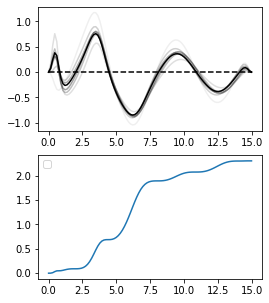

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     3.86e-01    4.86e-01   8.72e-01  -4.78e-01   7.42e-03     6 *
2     1.70e-01    2.33e-01   4.03e-01  -2.17e-01   1.65e-02     6 *
3     7.73e-02    1.01e-01   1.78e-01  -9.22e-02   8.70e-03     6 *
4     3.85e-02    4.23e-02   8.08e-02  -3.88e-02   3.48e-03     6 *
5     2.24e-02    1.72e-02   3.96e-02  -1.61e-02   1.11e-03     6 *
6     1.51e-02    7.58e-03   2.27e-02  -7.24e-03   3.40e-04     6 *
7     1.12e-02    4.12e-03   1.53e-02  -3.93e-03   1.90e-04     6 *
8     8.73e-03    2.67e-03   1.14e-02  -2.49e-03   1.78e-04     6 *


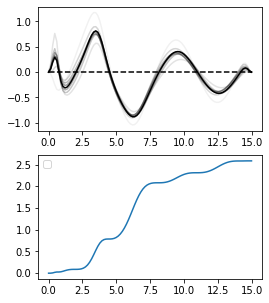

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     3.93e-01    4.87e-01   8.80e-01  -4.72e-01   1.52e-02     6 *
2     1.79e-01    2.37e-01   4.16e-01  -2.14e-01   2.28e-02     6 *
3     8.77e-02    1.03e-01   1.91e-01  -9.15e-02   1.17e-02     6 *
4     4.88e-02    4.37e-02   9.25e-02  -3.89e-02   4.84e-03     6 *
5     3.26e-02    1.79e-02   5.05e-02  -1.62e-02   1.69e-03     6 *
6     2.52e-02    7.97e-03   3.32e-02  -7.35e-03   6.18e-04     6 *
7     2.12e-02    4.36e-03   2.56e-02  -4.01e-03   3.53e-04     6 *
8     1.87e-02    2.85e-03   2.15e-02  -2.56e-03   2.89e-04     6 *
9     1.70e-02    1.93e-03   1.89e-02  -1.70e-03   2.34e-04     6 *
10    1.59e-02    1.23e-03   1.71e-02  -1.07e-03   1.63e-04     6 *
11    1.53e-02    7.08e-04   1.60e-02  -6.10e-04   9.77e-05     6 *
12    1.50e-02    3.65e-04   1.53e-02  -3.15e-04   5.01e-05     6 *
13    1.48e-02    1.69e-04   1.50e-02  -1.47e-04   2

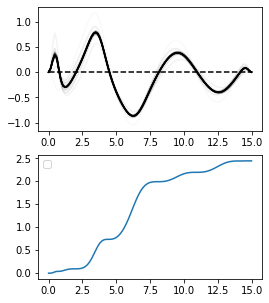

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     4.00e-01    4.88e-01   8.88e-01  -4.65e-01   2.33e-02     6 *
2     1.89e-01    2.40e-01   4.30e-01  -2.11e-01   2.94e-02     6 *
3     9.85e-02    1.06e-01   2.04e-01  -9.08e-02   1.50e-02     6 *
4     5.96e-02    4.52e-02   1.05e-01  -3.89e-02   6.32e-03     6 *
5     4.32e-02    1.87e-02   6.19e-02  -1.64e-02   2.34e-03     6 *
6     3.57e-02    8.39e-03   4.41e-02  -7.46e-03   9.33e-04     6 *
7     3.16e-02    4.63e-03   3.63e-02  -4.09e-03   5.40e-04     6 *
8     2.90e-02    3.06e-03   3.20e-02  -2.64e-03   4.19e-04     6 *
9     2.72e-02    2.10e-03   2.93e-02  -1.78e-03   3.26e-04     6 *
10    2.61e-02    1.35e-03   2.74e-02  -1.13e-03   2.24e-04     6 *
11    2.54e-02    7.89e-04   2.62e-02  -6.56e-04   1.34e-04     6 *
12    2.51e-02    4.12e-04   2.55e-02  -3.43e-04   6.90e-05     6 *
13    2.49e-02    1.93e-04   2.51e-02  -1.62e-04   3

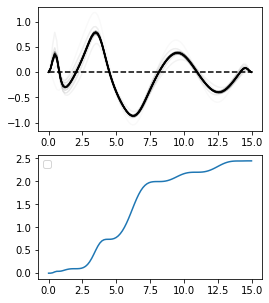

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     4.07e-01    4.89e-01   8.96e-01  -4.58e-01   3.15e-02     6 *
2     1.99e-01    2.44e-01   4.43e-01  -2.08e-01   3.61e-02     6 *
3     1.09e-01    1.08e-01   2.18e-01  -9.00e-02   1.83e-02     6 *
4     7.03e-02    4.68e-02   1.17e-01  -3.89e-02   7.87e-03     6 *
5     5.38e-02    1.96e-02   7.33e-02  -1.65e-02   3.04e-03     6 *
6     4.62e-02    8.84e-03   5.50e-02  -7.56e-03   1.28e-03     6 *
7     4.20e-02    4.92e-03   4.69e-02  -4.18e-03   7.47e-04     6 *
8     3.93e-02    3.29e-03   4.26e-02  -2.73e-03   5.66e-04     6 *
9     3.74e-02    2.29e-03   3.97e-02  -1.86e-03   4.31e-04     6 *
10    3.62e-02    1.49e-03   3.77e-02  -1.20e-03   2.95e-04     6 *
11    3.55e-02    8.81e-04   3.64e-02  -7.05e-04   1.76e-04     6 *
12    3.52e-02    4.66e-04   3.56e-02  -3.74e-04   9.18e-05     6 *
13    3.50e-02    2.21e-04   3.52e-02  -1.79e-04   4

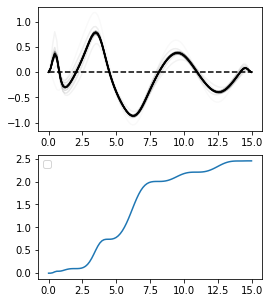

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     4.14e-01    4.90e-01   9.04e-01  -4.51e-01   3.95e-02     6 *
2     2.09e-01    2.48e-01   4.57e-01  -2.05e-01   4.29e-02     6 *
3     1.20e-01    1.11e-01   2.31e-01  -8.93e-02   2.18e-02     6 *
4     8.09e-02    4.85e-02   1.29e-01  -3.90e-02   9.50e-03     6 *
5     6.43e-02    2.05e-02   8.47e-02  -1.67e-02   3.78e-03     6 *
6     5.66e-02    9.32e-03   6.59e-02  -7.67e-03   1.64e-03     6 *
7     5.23e-02    5.24e-03   5.76e-02  -4.26e-03   9.74e-04     6 *
8     4.95e-02    3.54e-03   5.31e-02  -2.81e-03   7.30e-04     6 *
9     4.76e-02    2.49e-03   5.01e-02  -1.94e-03   5.51e-04     6 *
10    4.63e-02    1.65e-03   4.80e-02  -1.27e-03   3.77e-04     6 *
11    4.56e-02    9.84e-04   4.65e-02  -7.58e-04   2.26e-04     6 *
12    4.52e-02    5.27e-04   4.57e-02  -4.08e-04   1.19e-04     6 *
13    4.50e-02    2.53e-04   4.52e-02  -1.98e-04   5

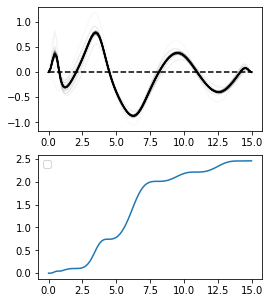

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     2
1     4.21e-01    4.92e-01   9.12e-01  -4.44e-01   4.75e-02     6 *
2     2.19e-01    2.51e-01   4.70e-01  -2.02e-01   4.97e-02     6 *
3     1.30e-01    1.14e-01   2.44e-01  -8.85e-02   2.53e-02     6 *
4     9.15e-02    5.02e-02   1.42e-01  -3.90e-02   1.12e-02     6 *
5     7.47e-02    2.14e-02   9.61e-02  -1.68e-02   4.57e-03     6 *
6     6.69e-02    9.82e-03   7.67e-02  -7.78e-03   2.04e-03     6 *
7     6.25e-02    5.57e-03   6.81e-02  -4.35e-03   1.22e-03     6 *
8     5.96e-02    3.81e-03   6.35e-02  -2.90e-03   9.12e-04     6 *
9     5.76e-02    2.71e-03   6.03e-02  -2.03e-03   6.87e-04     6 *
10    5.63e-02    1.82e-03   5.81e-02  -1.35e-03   4.71e-04     6 *
11    5.55e-02    1.10e-03   5.66e-02  -8.15e-04   2.85e-04     6 *
12    5.50e-02    5.96e-04   5.56e-02  -4.44e-04   1.52e-04     6 *
13    5.48e-02    2.90e-04   5.51e-02  -2.19e-04   7

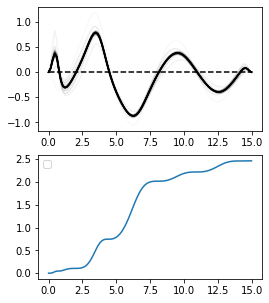

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     2
1     4.27e-01    4.93e-01   9.20e-01  -4.37e-01   5.54e-02     6 *
2     2.29e-01    2.55e-01   4.84e-01  -1.99e-01   5.66e-02     6 *
3     1.41e-01    1.17e-01   2.58e-01  -8.78e-02   2.89e-02     6 *
4     1.02e-01    5.20e-02   1.54e-01  -3.90e-02   1.30e-02     6 *
5     8.50e-02    2.24e-02   1.07e-01  -1.70e-02   5.40e-03     6 *
6     7.71e-02    1.04e-02   8.74e-02  -7.89e-03   2.47e-03     6 *
7     7.26e-02    5.92e-03   7.86e-02  -4.43e-03   1.49e-03     6 *
8     6.97e-02    4.10e-03   7.38e-02  -2.98e-03   1.11e-03     6 *
9     6.75e-02    2.96e-03   7.05e-02  -2.11e-03   8.40e-04     6 *
10    6.61e-02    2.00e-03   6.81e-02  -1.43e-03   5.79e-04     6 *
11    6.52e-02    1.23e-03   6.65e-02  -8.76e-04   3.53e-04     6 *
12    6.48e-02    6.75e-04   6.54e-02  -4.85e-04   1.90e-04     6 *
13    6.45e-02    3.32e-04   6.48e-02  -2.42e-04   9

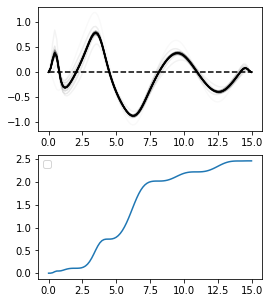

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     2
1     4.34e-01    4.94e-01   9.28e-01  -4.31e-01   6.32e-02     6 *
2     2.38e-01    2.59e-01   4.98e-01  -1.96e-01   6.35e-02     6 *
3     1.51e-01    1.20e-01   2.71e-01  -8.70e-02   3.26e-02     6 *
4     1.12e-01    5.38e-02   1.66e-01  -3.90e-02   1.48e-02     6 *
5     9.51e-02    2.34e-02   1.18e-01  -1.71e-02   6.28e-03     6 *
6     8.71e-02    1.09e-02   9.81e-02  -7.99e-03   2.93e-03     6 *
7     8.26e-02    6.30e-03   8.89e-02  -4.52e-03   1.79e-03     6 *
8     7.95e-02    4.41e-03   8.40e-02  -3.07e-03   1.34e-03     6 *
9     7.73e-02    3.22e-03   8.06e-02  -2.21e-03   1.01e-03     6 *
10    7.58e-02    2.21e-03   7.80e-02  -1.51e-03   7.03e-04     6 *
11    7.49e-02    1.37e-03   7.63e-02  -9.41e-04   4.33e-04     6 *
12    7.44e-02    7.64e-04   7.51e-02  -5.28e-04   2.36e-04     6 *
13    7.41e-02    3.81e-04   7.45e-02  -2.67e-04   1

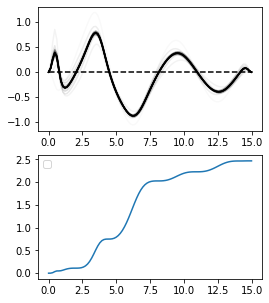

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     4.41e-01    4.95e-01   9.36e-01  -4.24e-01   7.09e-02     6 *
2     2.48e-01    2.63e-01   5.11e-01  -1.93e-01   7.04e-02     6 *
3     1.61e-01    1.23e-01   2.84e-01  -8.63e-02   3.63e-02     6 *
4     1.22e-01    5.57e-02   1.78e-01  -3.90e-02   1.67e-02     6 *
5     1.05e-01    2.44e-02   1.30e-01  -1.72e-02   7.21e-03     6 *
6     9.71e-02    1.15e-02   1.09e-01  -8.09e-03   3.42e-03     6 *
7     9.25e-02    6.71e-03   9.92e-02  -4.60e-03   2.11e-03     6 *
8     8.93e-02    4.74e-03   9.41e-02  -3.16e-03   1.58e-03     6 *
9     8.70e-02    3.51e-03   9.05e-02  -2.30e-03   1.21e-03     6 *
10    8.54e-02    2.44e-03   8.79e-02  -1.60e-03   8.44e-04     6 *
11    8.44e-02    1.54e-03   8.59e-02  -1.01e-03   5.25e-04     6 *
12    8.38e-02    8.65e-04   8.47e-02  -5.75e-04   2.90e-04     6 *
13    8.35e-02    4.36e-04   8.40e-02  -2.95e-04   1

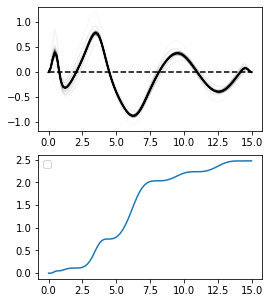

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     4.47e-01    4.97e-01   9.44e-01  -4.18e-01   7.85e-02     6 *
2     2.57e-01    2.67e-01   5.24e-01  -1.90e-01   7.74e-02     6 *
3     1.71e-01    1.26e-01   2.97e-01  -8.55e-02   4.02e-02     6 *
4     1.32e-01    5.77e-02   1.90e-01  -3.90e-02   1.87e-02     6 *
5     1.15e-01    2.55e-02   1.41e-01  -1.73e-02   8.19e-03     6 *
6     1.07e-01    1.21e-02   1.19e-01  -8.20e-03   3.94e-03     6 *
7     1.02e-01    7.13e-03   1.09e-01  -4.68e-03   2.45e-03     6 *
8     9.90e-02    5.10e-03   1.04e-01  -3.25e-03   1.86e-03     6 *
9     9.66e-02    3.82e-03   1.00e-01  -2.40e-03   1.42e-03     6 *
10    9.49e-02    2.70e-03   9.76e-02  -1.69e-03   1.00e-03     6 *
11    9.38e-02    1.72e-03   9.55e-02  -1.09e-03   6.32e-04     6 *
12    9.32e-02    9.80e-04   9.41e-02  -6.27e-04   3.53e-04     6 *
13    9.28e-02    5.00e-04   9.33e-02  -3.25e-04   1

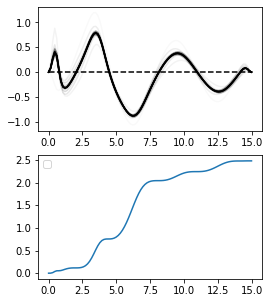

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     4.53e-01    4.98e-01   9.51e-01  -4.12e-01   8.61e-02     6 *
2     2.66e-01    2.72e-01   5.38e-01  -1.87e-01   8.43e-02     6 *
3     1.81e-01    1.29e-01   3.10e-01  -8.47e-02   4.41e-02     6 *
4     1.42e-01    5.98e-02   2.02e-01  -3.90e-02   2.08e-02     6 *
5     1.25e-01    2.67e-02   1.52e-01  -1.75e-02   9.23e-03     6 *
6     1.17e-01    1.28e-02   1.29e-01  -8.29e-03   4.50e-03     6 *
7     1.12e-01    7.59e-03   1.19e-01  -4.76e-03   2.83e-03     6 *
8     1.09e-01    5.49e-03   1.14e-01  -3.34e-03   2.16e-03     6 *
9     1.06e-01    4.17e-03   1.10e-01  -2.50e-03   1.67e-03     6 *
10    1.04e-01    2.98e-03   1.07e-01  -1.79e-03   1.19e-03     6 *
11    1.03e-01    1.92e-03   1.05e-01  -1.17e-03   7.56e-04     6 *
12    1.02e-01    1.11e-03   1.03e-01  -6.83e-04   4.27e-04     6 *
13    1.02e-01    5.73e-04   1.03e-01  -3.59e-04   2

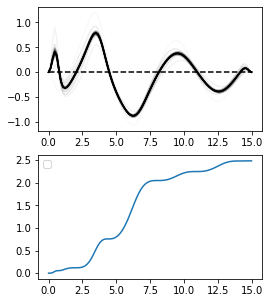

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     4.60e-01    4.99e-01   9.59e-01  -4.06e-01   9.35e-02     6 *
2     2.75e-01    2.76e-01   5.51e-01  -1.84e-01   9.14e-02     6 *
3     1.91e-01    1.32e-01   3.23e-01  -8.40e-02   4.81e-02     6 *
4     1.52e-01    6.19e-02   2.14e-01  -3.90e-02   2.29e-02     6 *
5     1.35e-01    2.79e-02   1.63e-01  -1.76e-02   1.03e-02     6 *
6     1.26e-01    1.35e-02   1.40e-01  -8.39e-03   5.10e-03     6 *
7     1.21e-01    8.08e-03   1.29e-01  -4.84e-03   3.24e-03     6 *
8     1.18e-01    5.91e-03   1.24e-01  -3.43e-03   2.48e-03     6 *
9     1.15e-01    4.54e-03   1.20e-01  -2.60e-03   1.94e-03     6 *
10    1.13e-01    3.28e-03   1.17e-01  -1.89e-03   1.40e-03     6 *
11    1.12e-01    2.15e-03   1.14e-01  -1.25e-03   8.98e-04     6 *
12    1.11e-01    1.26e-03   1.13e-01  -7.43e-04   5.13e-04     6 *
13    1.11e-01    6.57e-04   1.12e-01  -3.96e-04   2

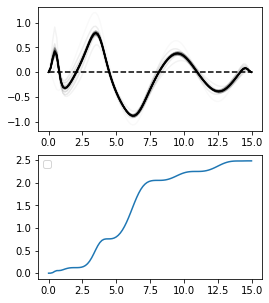

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     4.66e-01    5.00e-01   9.66e-01  -4.00e-01   1.01e-01     6 *
2     2.84e-01    2.80e-01   5.64e-01  -1.82e-01   9.85e-02     6 *
3     2.01e-01    1.35e-01   3.36e-01  -8.32e-02   5.22e-02     6 *
4     1.62e-01    6.41e-02   2.26e-01  -3.89e-02   2.51e-02     6 *
5     1.44e-01    2.92e-02   1.73e-01  -1.77e-02   1.15e-02     6 *
6     1.36e-01    1.42e-02   1.50e-01  -8.48e-03   5.74e-03     6 *
7     1.31e-01    8.59e-03   1.39e-01  -4.91e-03   3.68e-03     6 *
8     1.27e-01    6.36e-03   1.34e-01  -3.51e-03   2.85e-03     6 *
9     1.25e-01    4.95e-03   1.30e-01  -2.71e-03   2.24e-03     6 *
10    1.23e-01    3.63e-03   1.26e-01  -2.00e-03   1.63e-03     6 *
11    1.21e-01    2.40e-03   1.24e-01  -1.34e-03   1.06e-03     6 *
12    1.20e-01    1.42e-03   1.22e-01  -8.09e-04   6.14e-04     6 *
13    1.20e-01    7.54e-04   1.21e-01  -4.37e-04   3

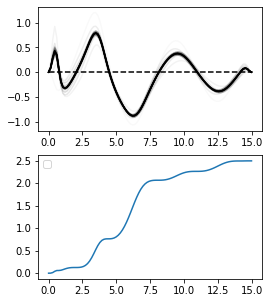

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.65e-01    0.00e+00   8.65e-01        n/a        n/a     3
1     4.72e-01    5.02e-01   9.73e-01  -3.94e-01   1.08e-01     6 *
2     2.93e-01    2.84e-01   5.77e-01  -1.79e-01   1.06e-01     6 *
3     2.10e-01    1.39e-01   3.49e-01  -8.24e-02   5.64e-02     6 *
4     1.71e-01    6.64e-02   2.38e-01  -3.89e-02   2.74e-02     6 *
5     1.54e-01    3.05e-02   1.84e-01  -1.78e-02   1.27e-02     6 *
6     1.45e-01    1.50e-02   1.60e-01  -8.58e-03   6.43e-03     6 *
7     1.40e-01    9.14e-03   1.49e-01  -4.99e-03   4.16e-03     6 *
8     1.36e-01    6.85e-03   1.43e-01  -3.60e-03   3.24e-03     6 *
9     1.34e-01    5.39e-03   1.39e-01  -2.81e-03   2.58e-03     6 *
10    1.32e-01    4.00e-03   1.36e-01  -2.11e-03   1.90e-03     6 *
11    1.30e-01    2.69e-03   1.33e-01  -1.44e-03   1.25e-03     6 *
12    1.29e-01    1.61e-03   1.31e-01  -8.80e-04   7.32e-04     6 *
13    1.29e-01    8.64e-04   1.30e-01  -4.82e-04   3

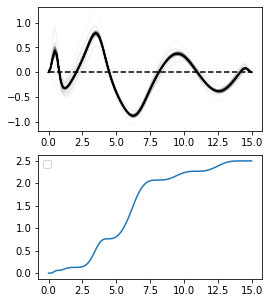

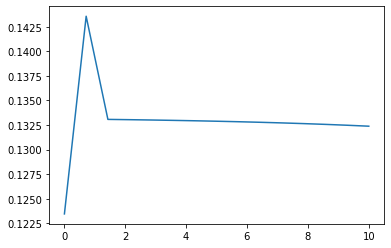

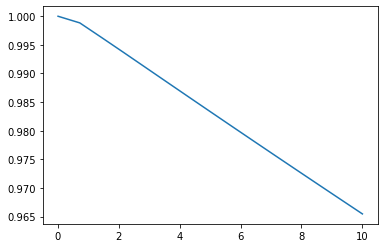

In [20]:
omega=1
ampl0=0.000001
#T=8
mu=0.5
g=0.2*omega
#ampl0=1
T=15
nt=100
tlist = np.linspace(0,T, nt)
gamma=1/1000
Temp=np.linspace(0.01,10,15)

#Nb=0
def hamiltonian(omega, ampl0, mu,g,gamma,Nb):
      """Two-level-system Hamiltonian

      Args:
          omega (float): energy separation of the qubit levels
          ampl0 (float): constant amplitude of the driving field
      """
      HA = qutip.Qobj(H0(g,gamma,Nb))
      H1= qutip.Qobj(He(mu))
      def guess_control(t, args):
          return ampl0*krotov.shapes.flattop(
              t, t_start=0, t_stop=T, t_rise=0.005, func="blackman"
          )
      def guess_control2(t, args):
          return ampl0*krotov.shapes.flattop(
              t, t_start=0, t_stop=T, t_rise=0.005, func="blackman"
          )
      
      return [HA, [H1, guess_control]]
def S(t):
    """Shape function for the field update"""
    return krotov.shapes.flattop(
        t, t_start=0, t_stop=T, t_rise=0.05 * T, t_fall=0.05 * T, func='sinsq'
    )
def plot_iterations(opt_result):
    """Plot the control fields in population dynamics over all iterations.

    This depends on ``store_all_pulses=True`` in the call to
    `optimize_pulses`.
    """

    fig, [ax_ctr,ax] = plt.subplots(nrows=2, figsize=(4, 5))
    n_iters = len(opt_result.iters)
    EEnergy=np.zeros(nt)
    for (iteration, pulses) in zip(opt_result.iters, opt_result.all_pulses):
        controls = [
            krotov.conversions.pulse_onto_tlist(pulse)
            for pulse in pulses
        ]
        objectives = opt_result.objectives_with_controls(controls)
        dynamics = objectives[0].mesolve(
            opt_result.tlist, e_ops=[]
        )
        if iteration == 0:
            ls = '--'  # dashed
            alpha = 1  # full opacity
            ctr_label = 'guess'
            pop_labels = ['0 (guess)', '1 (guess)']
        elif iteration == opt_result.iters[-1]:
            ls = '-'  # solid
            alpha = 1  # full opacity
            ctr_label = 'optimized'
            pop_labels = ['0 (optimized)', '1 (optimized)']
        else:
            ls = '-'  # solid
            alpha = 0.5 * float(iteration) / float(n_iters)  # max 50%
            ctr_label = None
            pop_labels = [None, None]
        ax_ctr.plot(
            dynamics.times,
            controls[0],
            label=ctr_label,
            color='black',
            ls=ls,
            alpha=alpha,
        )
    EField=np.transpose(np.array(opt_result.optimized_controls))
    EEnergy[0]=(np.square(EField[0]))*(T/nt)
    a=0
    for i in range (1,nt):
      a+=np.square(EField[i-1])
      EEnergy[i]=(np.square(EField[i])+a)*(T/nt)
      
    
    ax.plot(tlist,np.transpose(EEnergy))
    plt.legend()
    plt.show(fig)
    
def Power(vector,T):
    psi=vector[0]
    Energy=np.zeros(nt)
    Ergotropy=np.zeros(nt)
    for i in range (0,nt):
        Energy[i]=1/2*(np.real(psi[i][5])+np.real(psi[i][14])+(np.real(psi[i][2]))**2+(np.real(psi[i][4]))**2)-1/2
        D=np.real((1+2*np.real(Energy[i])-np.abs(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2-4*np.abs(1/2*(np.real(psi[i][9])+np.real(psi[i][2])**2-(np.real(psi[i][14])+np.real(psi[i][4])**2)+1j*2*(np.real(psi[i][11])+np.real(psi[i][2])*np.real(psi[i][4])))-1/2*(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2)
        Ergotropy[i]=np.real(Energy[i]-(np.sqrt(D)-1)/2)
    return Ergotropy[nt-1]/T

def Ratio(vector):
    psi=vector[0]
    Energy=np.zeros(nt)
    Ergotropy=np.zeros(nt)
    for i in range (0,nt):
        Energy[i]=1/2*(np.real(psi[i][5])+np.real(psi[i][14])+(np.real(psi[i][2]))**2+(np.real(psi[i][4]))**2)-1/2
        D=np.real((1+2*np.real(Energy[i])-np.abs(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2-4*np.abs(1/2*(np.real(psi[i][9])+np.real(psi[i][2])**2-(np.real(psi[i][14])+np.real(psi[i][4])**2)+1j*2*(np.real(psi[i][11])+np.real(psi[i][2])*np.real(psi[i][4])))-1/2*(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2)
        Ergotropy[i]=np.real(Energy[i]-(np.sqrt(D)-1)/2)
    return Ergotropy[nt-1]/Energy[nt-1]
    
power=np.zeros(len(Temp))
ratio=np.zeros(len(Temp))
for j in range (0,len(Temp)):
    Nb=1/(np.exp(omega/Temp[j])-1)
    H = hamiltonian(omega,ampl0,mu,g,gamma,Nb)
    pulse_options = {
        H[1][1]: dict(lambda_a=0.1, update_shape=S), 


    }
    #target=np.array([1,0, np.sqrt(2),0,np.sqrt(2),1/2,0,0,0,1/2,0,0,1/2,0,1/2])

    target=np.array([1,0, np.sqrt(2),0,np.sqrt(2),1/2,0,0,0,1/2,0,0,1/2,0,1/2])

    r=np.pi/4
    r2=np.pi/8
    theta=np.pi/4
    objectives = [
        krotov.Objective(
            #initial_state=qutip.Qobj(np.array([1,0,0,0,0,1/2*np.cosh(2*r2),0,-1/2*np.sinh(2*r2)*np.cos(theta),-1/2*np.sinh(2*r2)*np.sin(theta),1/2*np.cosh(2*r2),-1/2*np.sinh(2*r2)*np.sin(theta),1/2*np.sinh(2*r2)*np.cos(theta),1/2*np.cosh(2*r2),0,1/2*np.cosh(2*r2)])), target=qutip.Qobj(qutip.Qobj(np.array([1,0,0,0,0,1/2*np.cosh(2*r),0,-1/2*np.sinh(2*r)*np.cos(theta),-1/2*np.sinh(2*r)*np.sin(theta),1/2*np.cosh(2*r),-1/2*np.sinh(2*r)*np.sin(theta),1/2*np.sinh(2*r)*np.cos(theta),1/2*np.cosh(2*r),0,1/2*np.cosh(2*r)]))), H=H
            initial_state=qutip.Qobj(np.array([1,0,0,0,0,1/2,0,0,0,1/2,0,0,1/2,0,1/2])), target=qutip.Qobj(target), H=H
          )
      ]

    opt_result = krotov.optimize_pulses(
      objectives,
      pulse_options=pulse_options,
      tlist=tlist,
      fieldcoupling=mu,
      propagator=krotov.propagators.expm,
      chi_constructor=krotov.functionals.chis_ss,
      info_hook=krotov.info_hooks.print_table(J_T=krotov.functionals.J_T_ss),
      check_convergence=krotov.convergence.Or(
          krotov.convergence.value_below('9e-3', name='J_T'),
          krotov.convergence.check_monotonic_error,
          #krotov.convergence.check_monotonic_fidelity,

      ),
        iter_stop=20,
        store_all_pulses=True,
        overlap=inte,norm=lambda x: 1
    )
    plot_iterations(opt_result)
    
    power[j]=Power(opt_result.states,T)
    ratio[j]=Ratio(opt_result.states)
plt.figure()
plt.plot(Temp,power)
plt.figure()
plt.plot(Temp,ratio)
plt.show()

[ 0.1   5.05 10.  ]
iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     6.32e-01    0.00e+00   6.32e-01        n/a        n/a     3
1     4.16e-01    2.29e-01   6.45e-01  -2.16e-01   1.28e-02     6 *
2     2.64e-01    1.64e-01   4.28e-01  -1.52e-01   1.25e-02     6 *
3     1.80e-01    9.01e-02   2.70e-01  -8.42e-02   5.86e-03     6 *
4     1.26e-01    5.74e-02   1.83e-01  -5.39e-02   3.44e-03     6 *
5     8.77e-02    4.05e-02   1.28e-01  -3.80e-02   2.46e-03     6 *
6     6.05e-02    2.90e-02   8.96e-02  -2.72e-02   1.82e-03     6 *
7     4.13e-02    2.06e-02   6.18e-02  -1.93e-02   1.32e-03     6 *
8     2.79e-02    1.43e-02   4.22e-02  -1.34e-02   9.37e-04     6 *
9     1.87e-02    9.83e-03   2.85e-02  -9.18e-03   6.52e-04     6 *
10    1.25e-02    6.67e-03   1.91e-02  -6.22e-03   4.46e-04     6 *
11    8.30e-03    4.48e-03   1.28e-02  -4.18e-03   3.02e-04     6 *


4.254190878163004


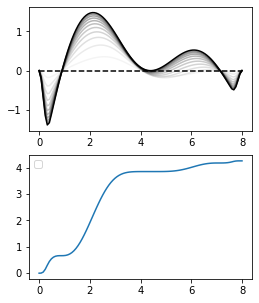

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     6.68e-01    0.00e+00   6.68e-01        n/a        n/a     3
1     4.77e-01    3.03e-01   7.79e-01  -1.91e-01   1.11e-01     6 *
2     3.53e-01    2.09e-01   5.61e-01  -1.24e-01   8.49e-02     6 *
3     2.92e-01    9.75e-02   3.89e-01  -6.08e-02   3.67e-02     6 *
4     2.55e-01    5.63e-02   3.12e-01  -3.64e-02   1.99e-02     6 *
5     2.31e-01    3.79e-02   2.68e-01  -2.47e-02   1.32e-02     6 *
6     2.13e-01    2.65e-02   2.40e-01  -1.73e-02   9.20e-03     6 *
7     2.01e-01    1.85e-02   2.20e-01  -1.20e-02   6.45e-03     6 *
8     1.93e-01    1.27e-02   2.06e-01  -8.27e-03   4.46e-03     6 *
9     1.87e-01    8.65e-03   1.96e-01  -5.61e-03   3.04e-03     6 *
10    1.84e-01    5.83e-03   1.89e-01  -3.77e-03   2.05e-03     6 *
11    1.81e-01    3.90e-03   1.85e-01  -2.52e-03   1.38e-03     6 *
12    1.79e-01    2.60e-03   1.82e-01  -1.68e-03   9.18e-04     6 *
13    1.78e-01    1.72e-03   1.80e-01  -1.11e-03   6

5.637206812365417


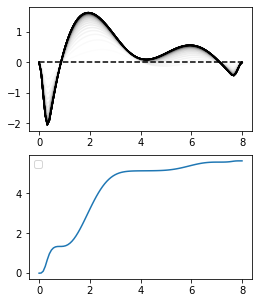

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     7.17e-01    0.00e+00   7.17e-01        n/a        n/a     3
1     5.13e-01    8.44e-01   1.36e+00  -2.04e-01   6.39e-01     6 *
2     4.35e-01    5.62e-01   9.97e-01  -7.78e-02   4.84e-01     6 *
3     4.09e-01    1.78e-01   5.88e-01  -2.53e-02   1.53e-01     6 *
4     3.95e-01    8.86e-02   4.84e-01  -1.41e-02   7.45e-02     6 *
5     3.86e-01    5.72e-02   4.43e-01  -9.20e-03   4.80e-02     6 *
6     3.80e-01    3.73e-02   4.17e-01  -5.99e-03   3.13e-02     6 *
7     3.76e-01    2.40e-02   4.00e-01  -3.85e-03   2.01e-02     6 *
8     3.74e-01    1.53e-02   3.89e-01  -2.45e-03   1.28e-02     6 *
9     3.72e-01    9.70e-03   3.82e-01  -1.55e-03   8.15e-03     6 *
10    3.71e-01    6.12e-03   3.78e-01  -9.80e-04   5.14e-03     6 *
11    3.71e-01    3.85e-03   3.75e-01  -6.16e-04   3.24e-03     6 *
12    3.70e-01    2.42e-03   3.73e-01  -3.86e-04   2.03e-03     6 *
13    3.70e-01    1.52e-03   3.72e-01  -2.42e-04   1

8.03104066143975


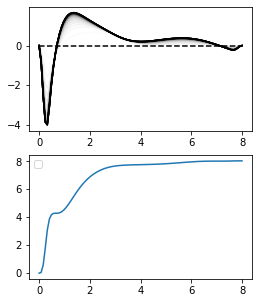

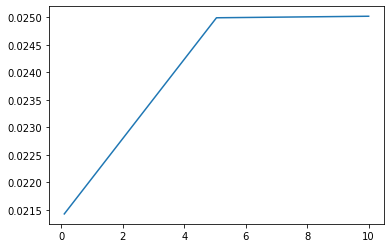

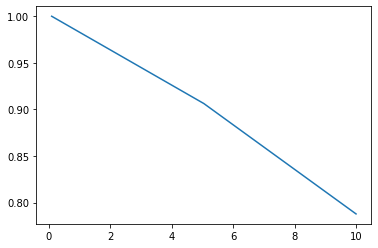

In [26]:
omega=5
ampl0=0.000001
#T=8
mu=0.5
g=0.2/5*omega
#ampl0=1
T=8
nt=100
tlist = np.linspace(0,T, nt)
gamma=0.05
Temp=np.linspace(0.1,10,3)
print(Temp)
#Nb=0
def hamiltonian(omega, ampl0, mu,g,gamma,Nb):
      """Two-level-system Hamiltonian

      Args:
          omega (float): energy separation of the qubit levels
          ampl0 (float): constant amplitude of the driving field
      """
      HA = qutip.Qobj(H0(g,gamma,Nb))
      H1= qutip.Qobj(He(mu))
      def guess_control(t, args):
          return ampl0*krotov.shapes.flattop(
              t, t_start=0, t_stop=T, t_rise=0.005, func="blackman"
          )
      def guess_control2(t, args):
          return ampl0*krotov.shapes.flattop(
              t, t_start=0, t_stop=T, t_rise=0.005, func="blackman"
          )
      
      return [HA, [H1, guess_control]]
def S(t):
    """Shape function for the field update"""
    return krotov.shapes.flattop(
        t, t_start=0, t_stop=T, t_rise=0.05 * T, t_fall=0.05 * T, func='sinsq'
    )
def plot_iterations(opt_result):
    """Plot the control fields in population dynamics over all iterations.

    This depends on ``store_all_pulses=True`` in the call to
    `optimize_pulses`.
    """

    fig, [ax_ctr,ax] = plt.subplots(nrows=2, figsize=(4, 5))
    n_iters = len(opt_result.iters)
    EEnergy=np.zeros(nt)
    for (iteration, pulses) in zip(opt_result.iters, opt_result.all_pulses):
        controls = [
            krotov.conversions.pulse_onto_tlist(pulse)
            for pulse in pulses
        ]
        objectives = opt_result.objectives_with_controls(controls)
        dynamics = objectives[0].mesolve(
            opt_result.tlist, e_ops=[]
        )
        if iteration == 0:
            ls = '--'  # dashed
            alpha = 1  # full opacity
            ctr_label = 'guess'
            pop_labels = ['0 (guess)', '1 (guess)']
        elif iteration == opt_result.iters[-1]:
            ls = '-'  # solid
            alpha = 1  # full opacity
            ctr_label = 'optimized'
            pop_labels = ['0 (optimized)', '1 (optimized)']
        else:
            ls = '-'  # solid
            alpha = 0.5 * float(iteration) / float(n_iters)  # max 50%
            ctr_label = None
            pop_labels = [None, None]
        ax_ctr.plot(
            dynamics.times,
            controls[0],
            label=ctr_label,
            color='black',
            ls=ls,
            alpha=alpha,
        )
    EField=np.transpose(np.array(opt_result.optimized_controls))
    EEnergy[0]=(np.square(EField[0]))*(T/nt)
    a=0
    for i in range (1,nt):
      a+=np.square(EField[i-1])
      EEnergy[i]=(np.square(EField[i])+a)*(T/nt)
      
    print(EEnergy[nt-1])
    ax.plot(tlist,np.transpose(EEnergy))
    plt.legend()
    plt.show(fig)
    
def Power(vector,T):
    psi=vector[0]
    Energy=np.zeros(nt)
    Ergotropy=np.zeros(nt)
    for i in range (0,nt):
        Energy[i]=1/2*(np.real(psi[i][5])+np.real(psi[i][14])+(np.real(psi[i][2]))**2+(np.real(psi[i][4]))**2)-1/2
        D=np.real((1+2*np.real(Energy[i])-np.abs(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2-4*np.abs(1/2*(np.real(psi[i][9])+np.real(psi[i][2])**2-(np.real(psi[i][14])+np.real(psi[i][4])**2)+1j*2*(np.real(psi[i][11])+np.real(psi[i][2])*np.real(psi[i][4])))-1/2*(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2)
        Ergotropy[i]=np.real(Energy[i]-(np.sqrt(D)-1)/2)
    return Ergotropy[nt-1]/T

def Ratio(vector):
    psi=vector[0]
    Energy=np.zeros(nt)
    Ergotropy=np.zeros(nt)
    for i in range (0,nt):
        Energy[i]=1/2*(np.real(psi[i][5])+np.real(psi[i][14])+(np.real(psi[i][2]))**2+(np.real(psi[i][4]))**2)-1/2
        D=np.real((1+2*np.real(Energy[i])-np.abs(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2-4*np.abs(1/2*(np.real(psi[i][9])+np.real(psi[i][2])**2-(np.real(psi[i][14])+np.real(psi[i][4])**2)+1j*2*(np.real(psi[i][11])+np.real(psi[i][2])*np.real(psi[i][4])))-1/2*(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2)
        Ergotropy[i]=np.real(Energy[i]-(np.sqrt(D)-1)/2)
    return Ergotropy[nt-1]/Energy[nt-1]
    
power=np.zeros(len(Temp))
ratio=np.zeros(len(Temp))
for j in range (0,len(Temp)):
    Nb=1/(np.exp(omega/Temp[j])-1)
    H = hamiltonian(omega,ampl0,mu,g,gamma,Nb)
    pulse_options = {
        H[1][1]: dict(lambda_a=1, update_shape=S), 


    }
    #target=np.array([1,0, np.sqrt(2),0,np.sqrt(2),1/2,0,0,0,1/2,0,0,1/2,0,1/2])
    y=np.pi/4
    target=np.array([1,0, np.sqrt(2)*np.cos(y),0,np.sqrt(2)*np.sin(y),1/2,0,0,0,1/2,0,0,1/2,0,1/2])

    r=np.pi/4
    r2=np.pi/8
    theta=np.pi/4
    objectives = [
        krotov.Objective(
            #initial_state=qutip.Qobj(np.array([1,0,0,0,0,1/2*np.cosh(2*r2),0,-1/2*np.sinh(2*r2)*np.cos(theta),-1/2*np.sinh(2*r2)*np.sin(theta),1/2*np.cosh(2*r2),-1/2*np.sinh(2*r2)*np.sin(theta),1/2*np.sinh(2*r2)*np.cos(theta),1/2*np.cosh(2*r2),0,1/2*np.cosh(2*r2)])), target=qutip.Qobj(qutip.Qobj(np.array([1,0,0,0,0,1/2*np.cosh(2*r),0,-1/2*np.sinh(2*r)*np.cos(theta),-1/2*np.sinh(2*r)*np.sin(theta),1/2*np.cosh(2*r),-1/2*np.sinh(2*r)*np.sin(theta),1/2*np.sinh(2*r)*np.cos(theta),1/2*np.cosh(2*r),0,1/2*np.cosh(2*r)]))), H=H
            initial_state=qutip.Qobj(np.array([1,0,0,0,0,1/2,0,0,0,1/2,0,0,1/2,0,1/2])), target=qutip.Qobj(target), H=H
          )
      ]

    opt_result = krotov.optimize_pulses(
      objectives,
      pulse_options=pulse_options,
      tlist=tlist,
      fieldcoupling=mu,
      propagator=krotov.propagators.expm,
      chi_constructor=krotov.functionals.chis_ss,
      info_hook=krotov.info_hooks.print_table(J_T=krotov.functionals.J_T_ss),
      check_convergence=krotov.convergence.Or(
          krotov.convergence.value_below('9e-3', name='J_T'),
          krotov.convergence.check_monotonic_error,
          #krotov.convergence.check_monotonic_fidelity,

      ),
        iter_stop=40,
        store_all_pulses=True,
        overlap=inte,norm=lambda x: 1
    )
    plot_iterations(opt_result)
    
    power[j]=Power(opt_result.states,T)
    ratio[j]=Ratio(opt_result.states)
plt.figure()
plt.plot(Temp,power/omega)
plt.figure()
plt.plot(Temp,ratio)
plt.show()

[0.85702662 0.99967941 1.00079177]
[ 0.1   5.05 10.  ]


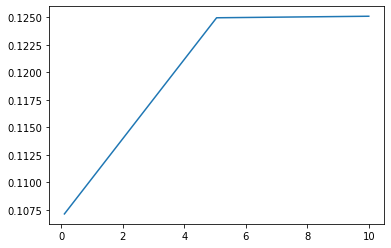

In [27]:
plt.plot(Temp,power)
print(power*T)
print(Temp)

In [5]:
def field_discrete(lista,t,dt):
    return -0.5*lista[int(t/dt)]
e=opt_result.optimized_controls[0]

    


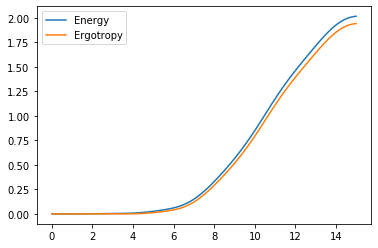

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [13]:
from scipy.integrate import odeint

def odeintz(func, z0, t, **kwargs):
    """An odeint-like function for complex valued differential equations."""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z


def pend(y, t, w0, N, gamma, g):

    dydt = [-1j*(w0*y[0]+g*y[1]+field_discrete(e,t,dt))-gamma/2*y[0], -1j*(w0*y[1]+g*y[0]), 1j*(g*(y[4]-y[3])-field_discrete(e,t,dt)*np.conjugate(y[1]))-gamma/2*y[2],2*g*np.imag(y[2]), -2*np.imag(g*y[2]+field_discrete(e,t,dt)*y[0])-gamma*y[4]+gamma*N,-2*1j*w0*y[5]-2*1j*(g*y[6]+field_discrete(e,t,dt)*y[0])-gamma*y[5],-2j*w0*y[6]-1j*(g*(y[5]+y[7])+field_discrete(e,t,dt)*y[1])-gamma/2*y[6],-2*1j*w0*y[7]-2*1j*g*y[6]]

    return dydt


y0 = [0.0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0]
g=0.2*omega
t = tlist
dt=tlist[1]-tlist[0]
N=Nb
w0=omega
Energy=np.zeros(len(t))
Ergotropy=np.zeros(len(t))
D=np.zeros(len(t))
sol = odeintz(pend, y0, t, args=( w0, N, gamma, g))

D=(1+2*sol[:,3]-2*np.absolute(sol[:,1])**2)**2-4*np.absolute(sol[:,7]-sol[:,1]**2)**2
Energy=w0*sol[:,3]
Ergotropy=w0*(sol[:,3]-1/2*(np.sqrt(D)-1))

plt.plot(t,np.real(Energy),label= "Energy")
plt.plot(t,np.real(Ergotropy),label= "Ergotropy")

plt.legend()
plt.show()

print(Ergotropy/Energy[nt-1])


In [46]:
np.exp(-1j*w0)

(0.5403023058681398-0.8414709848078965j)

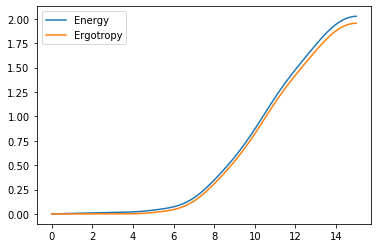

[0.00000000e+00 7.20273618e-04 1.44048765e-03 2.16182299e-03
 2.89018585e-03 3.63496379e-03 4.39706873e-03 5.16641309e-03
 5.93267965e-03 6.69196780e-03 7.44745269e-03 8.20686682e-03
 8.97897645e-03 9.77027552e-03 1.05824848e-02 1.14110965e-02
 1.22450707e-02 1.30678063e-02 1.38595882e-02 1.46017641e-02
 1.52827649e-02 1.59056190e-02 1.64956462e-02 1.71057010e-02
 1.78153598e-02 1.87212817e-02 1.99196133e-02 2.14862377e-02
 2.34627616e-02 2.58531055e-02 2.86301716e-02 3.17487336e-02
 3.51605810e-02 3.88293862e-02 4.27440811e-02 4.69302030e-02
 5.14587873e-02 5.64521847e-02 6.20858458e-02 6.85848463e-02
 7.62139666e-02 8.52607500e-02 9.60123086e-02 1.08728517e-01
 1.23615946e-01 1.40807468e-01 1.60351367e-01 1.82211311e-01
 2.06276029e-01 2.32375891e-01 2.60303298e-01 2.89834304e-01
 3.20749540e-01 3.52853056e-01 3.85987958e-01 4.20047919e-01
 4.54983749e-01 4.90804432e-01 5.27572226e-01 5.65391764e-01
 6.04393554e-01 6.44712914e-01 6.86466122e-01 7.29726362e-01
 7.74502559e-01 8.207242

In [62]:
psi=opt_result.states[0]
Energy=np.zeros(nt)
Ergotropy=np.zeros(nt)
for i in range (0,nt):
    Energy[i]=1/2*(np.real(psi[i][5])+np.real(psi[i][14])+(np.real(psi[i][2]))**2+(np.real(psi[i][4]))**2)-1/2
    D=np.real((1+2*np.real(Energy[i])-np.abs(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2-4*np.abs(1/2*(np.real(psi[i][9])+np.real(psi[i][2])**2-(np.real(psi[i][14])+np.real(psi[i][4])**2)+1j*2*(np.real(psi[i][11])+np.real(psi[i][2])*np.real(psi[i][4])))-1/2*(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2)
    Ergotropy[i]=np.real(Energy[i]-(np.sqrt(D)-1)/2)
plt.plot(opt_result.tlist,Energy,label="Energy")
plt.plot(opt_result.tlist,Ergotropy,label="Ergotropy")
plt.legend()

plt.show()

print(Energy)

In [34]:
for i in range(0,nt):
    a=opt_result.states[0][i]
    A=np.array([[a[5,0],a[6,0],a[7,0],a[8,0]],[a[6,0],a[9,0],a[10,0],a[11,0]],[a[7,0],a[10,0],a[12,0],a[13,0]],[a[8,0],a[11,0],a[13,0],a[14,0]]])
    print(1/(np.sqrt(np.linalg.det(2*A))))

(1+0j)
(0.9998236878688582+0j)
(0.9996474645346438+0j)
(0.9994713297735056+0j)
(0.9992952832567578+0j)
(0.9991193245520735+0j)
(0.998943453125058+0j)
(0.9987676683411918+0j)
(0.9985919694681453+0j)
(0.9984163556784448+0j)
(0.9982408260524883+0j)
(0.9980653795818987+0j)
(0.9978900151731931+0j)
(0.9977147316517699+0j)
(0.9975395277661854+0j)
(0.9973644021927085+0j)
(0.9971893535401383+0j)
(0.9970143803548661+0j)
(0.9968394811261602+0j)
(0.9966646542916567+0j)
(0.9964898982430359+0j)
(0.996315211331862+0j)
(0.996140591875564+0j)
(0.99596603816354+0j)
(0.9957915484633562+0j)
(0.9956171210270213+0j)
(0.995442754097315+0j)
(0.995268445914143+0j)
(0.9950941947208967+0j)
(0.9949199987707978+0j)
(0.9947458563331988+0j)
(0.9945717656998191+0j)
(0.9943977251908962+0j)
(0.9942237331612241+0j)
(0.9940497880060627+0j)
(0.993875888166891+0j)
(0.9937020321369878+0j)
(0.9935282184668178+0j)
(0.9933544457692012+0j)
(0.9931807127242525+0j)
(0.9930070180840662+0j)
(0.9928333606771368+0j)
(0.99265973941249

In [26]:
omega=1
ampl0=0.00001
#T=8
mu=0.05
g=0.2*omega
#ampl0=1
T=60
nt=100000
tlist = np.linspace(0,T, nt)
gamma=1/500
Temp=10
Nb=1/(np.exp(omega/Temp)-1)
H = hamiltonian(omega,ampl0,mu,g,gamma,Nb)

In [16]:
for i in range(0,nt):
    print(opt_result.states[0][i][9]*opt_result.states[0][i][14])

[[0.25+0.j]]
[[0.25005626+0.j]]
[[0.25044607+0.j]]
[[0.25148438+0.j]]
[[0.25345197+0.j]]
[[0.25658303+0.j]]
[[0.26105546+0.j]]
[[0.26698322+0.j]]
[[0.27441031+0.j]]
[[0.28330645+0.j]]
[[0.2935645+0.j]]
[[0.30500081+0.j]]
[[0.3173594+0.j]]
[[0.33032107+0.j]]
[[0.34351806+0.j]]
[[0.35655433+0.j]]
[[0.36903038+0.j]]
[[0.38057086+0.j]]
[[0.39085259+0.j]]
[[0.39962996+0.j]]
[[0.40675501+0.j]]
[[0.41219009+0.j]]
[[0.41601149+0.j]]
[[0.418404+0.j]]
[[0.41964711+0.j]]
[[0.42009471+0.j]]
[[0.4201504+0.j]]
[[0.4202412+0.j]]
[[0.42079165+0.j]]
[[0.42220025+0.j]]
[[0.42481904+0.j]]
[[0.42893703+0.j]]
[[0.43476703+0.j]]
[[0.44243586+0.j]]
[[0.45197737+0.j]]
[[0.46332854+0.j]]
[[0.47632888+0.j]]
[[0.49072399+0.j]]
[[0.50617409+0.j]]
[[0.52226838+0.j]]
[[0.53854535+0.j]]
[[0.55451883+0.j]]
[[0.56970822+0.j]]
[[0.58367095+0.j]]
[[0.59603422+0.j]]
[[0.60652312+0.j]]
[[0.61498211+0.j]]
[[0.62138777+0.j]]
[[0.62585132+0.j]]
[[0.62861098+0.j]]
[[0.63001498+0.j]]
[[0.63049728+0.j]]
[[0.6305484+0.j]]
[[0.63

In [6]:
HH=H[0]+H[1][0]*2
initial=qutip.Qobj(target)
t=np.linspace(0,T,nt)
dt=t[1]-t[0]
psi=(-1*HH*dt).expm()*target
phi=(1*HH*dt).expm()*psi
print(psi[12]*psi[5])
print(psi)
print(phi)
a=psi-phi
phi=(1*HH.dag()*dt).expm()*psi
b=psi-phi
print(phi[9]*phi[14])
print(phi[12]*phi[5])


(0.9126174682612764+0j)
[ 1.        +0.j  0.29398224+0.j  2.00069454+0.j  0.56559684+0.j
  0.33394542+0.j  0.43570454+0.j -0.73910825+0.j -0.10254632+0.j
 -0.27778806+0.j  1.94794871+0.j -0.27650899+0.j  0.46844397+0.j
  2.09457873+0.j  0.73910825+0.j  0.56133335+0.j]
[ 1.00000000e+00+0.j -4.16333634e-17+0.j  1.41421356e+00+0.j
  4.85722573e-17+0.j  1.41421356e+00+0.j  1.25458924e+00+0.j
 -6.93889390e-18+0.j -8.13632030e-01+0.j -8.13632030e-01+0.j
  1.25458924e+00+0.j -8.13632030e-01+0.j  8.13632030e-01+0.j
  1.25458924e+00+0.j  1.52655666e-16+0.j  1.25458924e+00+0.j]
(1.2913781313423702+0j)
(1.531002684419479+0j)


In [28]:
print(a)
print(b)

[ 0.00000000e+00+0.j  1.69630874e-04+0.j  8.48276911e-04+0.j
 -8.49554365e-05+0.j -8.48801314e-04+0.j -1.16113553e-03+0.j
 -9.76367292e-04+0.j  1.79652406e-06+0.j  1.09681300e-06+0.j
  7.81094526e-04+0.j  1.09807356e-06+0.j -3.51496130e-07+0.j
  1.18214470e-03+0.j  9.76367292e-04+0.j -7.81094526e-04+0.j]
[ 3.01213805e-05+0.j -1.69452697e-04+0.j -8.47752168e-04+0.j
  1.70012718e-04+0.j  8.49330474e-04+0.j  5.84315076e-04+0.j
  9.76366833e-04+0.j -2.89008763e-06+0.j -1.38375865e-06+0.j
 -3.90546709e-04+0.j -1.38916224e-06+0.j  1.99181084e-06+0.j
 -5.87326147e-04+0.j -9.76366833e-04+0.j  3.90546709e-04+0.j]


In [4]:
opt_result.states[0][nt-1][12]*opt_result.states[0][nt-1][5]

array([[0.17241739+0.j]])

In [9]:
z=qutip.Qobj([[  1.        ],
 [ -3.09624997],
 [  0.19202116],
 [ -1.15436765],
 [ -0.49805424],
 [-11.12673451],
 [  0.        ],
 [  0.        ],
 [ -8.5370321 ],
 [ -8.50412931],
 [  8.5370321 ],
 [  0.        ],
 [-11.12673451],
 [  0.        ]])

In [4]:
opt_result

Krotov Optimization Result
--------------------------
- Started at 2022-03-24 12:07:08
- Number of objectives: 1
- Number of iterations: 2
- Reason for termination: Reached convergence: Loss of monotonic convergence; error decrease < 0
- Ended at 2022-03-24 12:07:09 (0:00:01)

In [24]:
np.sqrt(z[5,0]-z[1,0]**2)*np.sqrt(z[9,0]-z[3,0]**2)

(-14.27418456212974+0j)

In [26]:
z=qutip.Qobj([[  1.        ],
 [ -3.09624997],
 [  0.19202116],
 [ -1.15436765],
 [ -0.49805424],
 [-11.12673451],
 [  0.        ],
 [  0.        ],
 [ -8.5370321 ],
 [ -8.50412931],
 [  8.5370321 ],
 [  0.        ],
 [-11.12673451],
 [  0.        ],
 [ -8.50412931]])

In [27]:
np.sqrt(z[5,0]-z[1,0]**2)*np.sqrt(z[9,0]-z[3,0]**2)

(-14.27418456212974+0j)

C:\Users\ricar\anaconda3\lib\site-packages\numpy\ma\core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


[array([[0.01092862]]), 0.0] [array([[-0.0039153]]), 0.0]


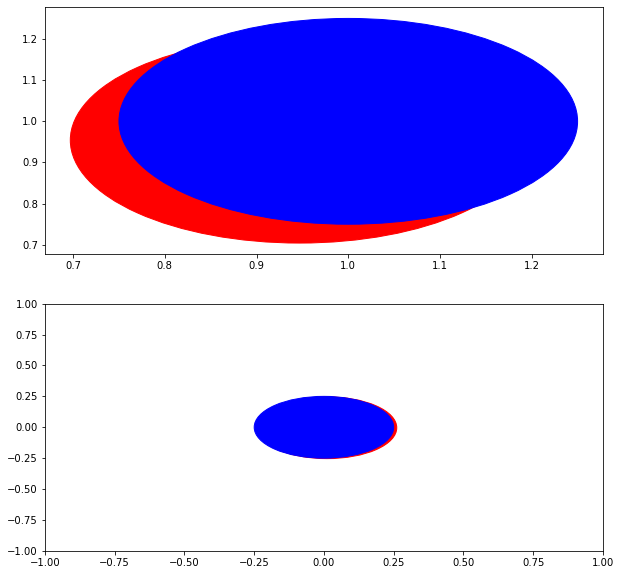

In [16]:
psi=opt_result.states[0]
circle1=plt.Circle((1/np.sqrt(2)*np.real(psi[nt-1][2]), 1/np.sqrt(2)*np.real(psi[nt-1][4])), 0.25, color='r')
circle2=plt.Circle((1/np.sqrt(2)*target[2], 1/np.sqrt(2)*target[4]), 0.25, color='b')

fig, ax = plt.subplots(2,figsize=(10,10)) 

x=[1/np.sqrt(2)*np.real(psi[nt-1][2]),1/np.sqrt(2)*target[2]]
y=[1/np.sqrt(2)*np.real(psi[nt-1][4]),1/np.sqrt(2)*target[4]]



ax[0].scatter(x,y)
ax[0].add_patch(circle1)
ax[0].add_patch(circle2)
#ax[0].set_ylim([-1, 2.5])
#ax[0].set_xlim([-1, 2.5])



x=[1/np.sqrt(2)*np.real(psi[nt-1][1]),1/np.sqrt(2)*target[1]]
y=[1/np.sqrt(2)*np.real(psi[nt-1][3]),1/np.sqrt(2)*target[3]]

print(x,y)


circle3=plt.Circle((1/np.sqrt(2)*np.real(psi[nt-1][1]), 1/np.sqrt(2)*np.real(psi[nt-1][3])), 0.25, color='r')
circle4=plt.Circle((1/np.sqrt(2)*target[1], 1/np.sqrt(2)*target[3]), 0.25, color='b')

ax[1].scatter(x,y)
ax[1].add_patch(circle3)
ax[1].add_patch(circle4)
ax[1].set_ylim([-1, 1])
ax[1].set_xlim([-1, 1])
plt.show()

Function to get the states at each t for optimized field

In [4]:
from scipy.integrate import simpson


def field_discrete(lista,t,dt):
    return lista[int(t/dt)]

def states(psi0,g,mu):
    HA = qutip.Qobj(H0(g))
    H1 =qutip.Qobj(Hde(mu,g))
    H2=qutip.Qobj(He(mu))
    states=np.zeros((len(opt_result.tlist),15),dtype=complex)
    integral=np.zeros(nt)

    for time_index in range(len(opt_result.tlist) - 1):
        if time_index==0:
            integral[time_index]=0
        else:    
            integral[time_index]=simpson(np.array(opt_result.optimized_controls[0])[:time_index], np.array(opt_result.tlist)[:time_index])
    
    dt=opt_result.tlist[1]-opt_result.tlist[0]
    for i in range (0,len(opt_result.tlist)):
        #A=HA+H1*field_discrete(opt_result.optimized_controls[0],opt_result.tlist[i],dt)+H2*field_discrete(integral,opt_result.tlist[i],dt)
        #A=HA+H1*opt_result.optimized_controls[0][i]+H2*integral[i]
        if i==len(opt_result.tlist)-1:
            A=HA+H2*opt_result.optimized_controls[0][i]+H1*(opt_result.optimized_controls[0][i]-opt_result.optimized_controls[0][i-1])/dt
        else:
            
            A=HA+H2*opt_result.optimized_controls[0][i]+H1*(opt_result.optimized_controls[0][i+1]-opt_result.optimized_controls[0][i])/dt
        if i==1:
            states[i,:]=(((-A * dt).expm())(psi0)).trans()
        elif i==0:
            states[i,:]=psi0.trans()
        else:
            states[i][:]=((-A * dt).expm())(qutip.Qobj(states[i-1][:])).trans()

    return states

In [27]:
psi0=qutip.Qobj(np.array([1,0,0,0,0,1/2,0,0,0,1/2,0,0,1/2,0,1/2]))
a=states(psi0,g,mu)
a[nt-1]


array([ 1.        +0.j,  1.06678182+0.j, -0.18755144+0.j, -0.09908427+0.j,
       -0.03322678+0.j,  0.5       +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.5       +0.j,  0.        +0.j,  0.        +0.j,
        0.5       +0.j,  0.        +0.j,  0.5       +0.j])

Function to get the real field

In [12]:
def field():
    integral=np.zeros(nt)
    for time_index in range(len(opt_result.tlist) - 1):
        if time_index==0:
            integral[time_index]=0
        else:    
            integral[time_index]=simpson(np.array(opt_result.optimized_controls[0])[:time_index], np.array(opt_result.tlist)[:time_index])
        
    return integral

Energy vs time

(array([1. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
        0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
        0.5+0.j]),)

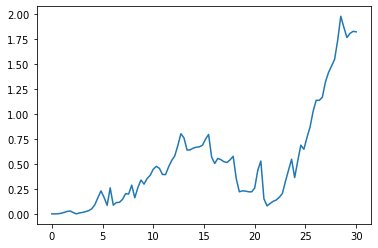

In [9]:
psi0=qutip.Qobj(np.array([1,0,0,0,0,1/2,0,0,0,1/2,0,0,1/2,0,1/2]))
psi=states(psi0,g,mu)
Energy=np.zeros(nt)
for i in range (0,np.shape(psi)[0]):
    Energy[i]=1/2*(np.real(psi[i][9])+(np.real(psi[i][2]))**2+np.real(psi[i][14])+(np.real(psi[i][4]))**2)-1/2
plt.plot(opt_result.tlist,Energy)

psi[0],

In [6]:
for i in range (0,nt):
    print(psi[i][9]*psi[i][14])
    print(psi[i][5]*psi[i][12])

(0.25+0j)
(0.25+0j)
(0.20146742857119704+0j)
(0.3801538652666529+0j)
(0.38903770122180825+0j)
(0.18708025026969077+0j)
(0.22611051998567272+0j)
(0.276436244067842+0j)
(0.22053085508855214+0j)
(0.36422264310737584+0j)
(0.3900696924888927+0j)
(0.17778181707253385+0j)
(0.2059456973411258+0j)
(0.3038655184096872+0j)
(0.2435593822906608+0j)
(0.3426465335563116+0j)
(0.38315538539100363+0j)
(0.1737753853175901+0j)
(0.1903061446322379+0j)
(0.33043594744314403+0j)


Electric field

0.0


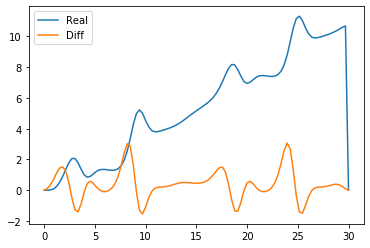

In [20]:
Efield=field()
plt.plot(opt_result.tlist,Efield,label="Real")
plt.plot(opt_result.tlist,opt_result.optimized_controls[0],label="Diff")
plt.legend()
print(Efield[nt-1])

In [103]:
for i in range(0,15):
    print(opt_result.states[0][i]-states[nt-1][i])

[[0.+0.j]]
[[0.00083666+0.j]]
[[-4.08678172e-05+0.j]]
[[0.00403471+0.j]]
[[-9.94567412e-05+0.j]]
[[-0.00178392+0.j]]
[[-0.00019355+0.j]]
[[-7.07437386e-05+0.j]]
[[5.56201896e-06+0.j]]
[[0.00010633+0.j]]
[[1.93456583e-05+0.j]]
[[7.15869375e-06+0.j]]
[[1.11022302e-16+0.j]]
[[1.2490009e-16+0.j]]
[[-1.11022302e-16+0.j]]


In [13]:
opt_result.states

[Quantum object: dims = [[15], [1]], shape = (15, 1), type = ket
 Qobj data =
 [[ 1.00000000e+00]
  [ 1.94665081e-02]
  [-3.52661910e-03]
  [ 3.48024050e-04]
  [ 5.32822762e-04]
  [ 6.08397471e-01]
  [-8.83382326e-02]
  [-2.95718841e-04]
  [ 8.60616666e-05]
  [ 3.80992321e-01]
  [ 1.85545391e-04]
  [-2.27791272e-04]
  [ 6.22557676e-01]
  [-1.02540227e-01]
  [ 4.18458414e-01]]]

In [46]:
optimized_dynamics = opt_result.optimized_objectives[0].essolve(
      tlist, e_ops=[]
  )
optimized_dynamics.states[0]

AttributeError: 'Objective' object has no attribute 'essolve'

In [22]:
opt_result.optimized_controls

[array([-1.38777878e-25, -4.05338078e-02, -8.06291106e-02, -7.98867479e-02,
        -7.94169483e-02, -7.91997330e-02, -7.91718587e-02, -7.92517354e-02,
        -7.93706327e-02, -7.94998530e-02, -7.96629298e-02, -7.99254245e-02,
        -8.03640445e-02, -8.10276400e-02, -8.19082271e-02, -8.29360929e-02,
        -8.40003544e-02, -8.49819578e-02, -4.27188862e-02, -1.38777878e-25])]

In [29]:
from scipy.integrate import simpson
integral=np.zeros(nt)

for time_index in range(len(opt_result.tlist) - 1):
    if time_index==0:
        integral[time_index]=0
    else:    
        integral[time_index]=simpson(np.array(opt_result.optimized_controls[0])[:time_index], np.array(opt_result.tlist)[:time_index])

In [55]:
def field_discrete2(t,args):
    return integral[int(t/dt)]

def field_discrete(t,args):
    return opt_result.optimized_controls[0][int(t/dt)]
T=4
nt=20
dt=opt_result.tlist[1]-opt_result.tlist[0]
HA =-1j* qutip.Qobj(H0(0.2))
H1 =-1j*qutip.Qobj(Hde(0.05,0.2))
H2= -1j*qutip.Qobj(He(0.05,0.2))
H=[HA,[H1,field_discrete],[H2,field_discrete2]]
psi0=qutip.Qobj(np.array([1,0,0,0,0,1/2,0,0,0,1/2,0,0,1/2,0,1/2]))


In [58]:
output = qutip.mesolve(H, psi0, opt_result.tlist)

In [81]:
print((((-1j*H * dt).expm())(psi0)).trans())

Quantum object: dims = [[1], [15]], shape = (1, 15), type = bra
Qobj data =
[[ 1.          0.          0.          0.          0.          0.54266889
  -0.00873926  0.          0.          0.46082681  0.          0.
   0.54266889 -0.00873926  0.46082681]]


In [52]:
output.states[0]

Quantum object: dims = [[15], [1]], shape = (15, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.35355339]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.35355339]
 [0.        ]
 [0.        ]
 [0.35355339]
 [0.        ]
 [0.35355339]]

In [53]:
psi0

Quantum object: dims = [[15], [1]], shape = (15, 1), type = ket
Qobj data =
[[1. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]
 [0.5]
 [0. ]
 [0. ]
 [0.5]
 [0. ]
 [0.5]]

In [4]:
from src.krotov.second_order import _overlap

In [ ]:
def plot_pulse(pulse, tlist):
    fig, ax = plt.subplots()
    if callable(pulse):
        pulse = np.array([pulse(t, args=None) for t in tlist])
    ax.plot(tlist, pulse)
    ax.set_xlabel('Time')
    ax.set_ylabel('Pulse Amplitude')
    plt.show(fig)

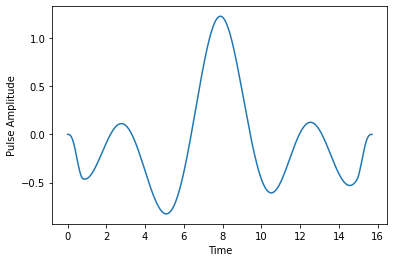

In [ ]:
plot_pulse(opt_result.optimized_controls[0], tlist)

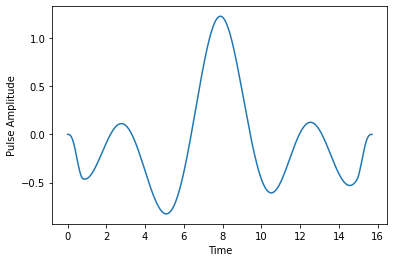

In [ ]:
plot_pulse(opt_result.optimized_controls[0], tlist)

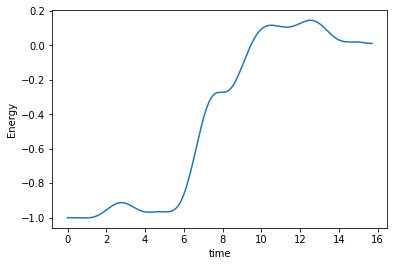

In [ ]:
Energy=np.zeros(nt)
optimized_dynamics = opt_result.optimized_objectives[0].mesolve(
      tlist, e_ops=[]
  )
for i in range(0,nt):
  H = hamiltonian(omega,ampl0,g)[0]+hamiltonian(omega,ampl0,g)[1][0]*opt_result.optimized_controls[0][i]
  rho=optimized_dynamics.states[i]*optimized_dynamics.states[i].dag()
  Energy[i]=np.real(np.matrix.trace(np.array(rho*H)))

plt.plot(tlist,Energy)
plt.xlabel("time")
plt.ylabel("Energy")
plt.show()

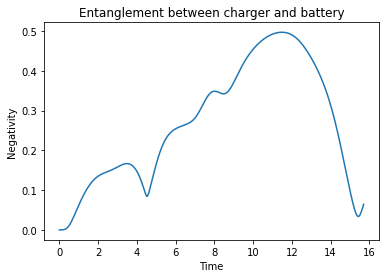

Negativity at final time T:  0.0644747582456493


In [ ]:
optimized_dynamics = opt_result.optimized_objectives[0].mesolve(
      tlist, e_ops=[]
  )

figen, ent = plt.subplots()
Negativity=np.zeros(nt)

for i in range(0,nt):
  PartialTranspose=qutip.partial_transpose(optimized_dynamics.states[i]*optimized_dynamics.states[i].dag(),[1,0])
  P=np.real(np.trace(np.sqrt(np.array(PartialTranspose.dag()*PartialTranspose))))
  Negativity[i]=(P-1)/2

ent.plot(tlist,Negativity)
ent.set_xlabel("Time")
ent.set_ylabel("Negativity")
ent.set_title("Entanglement between charger and battery")
plt.show(figen)
print("Negativity at final time T: ", Negativity[nt-1])


In [ ]:
def trace_A(rho):
    """Partial trace over the A degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qutip.Qobj(rho_q)

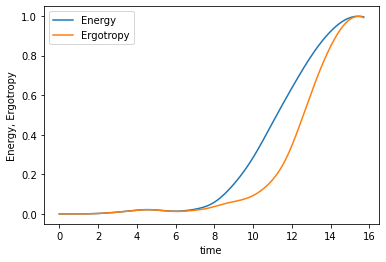

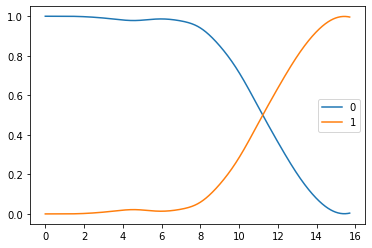

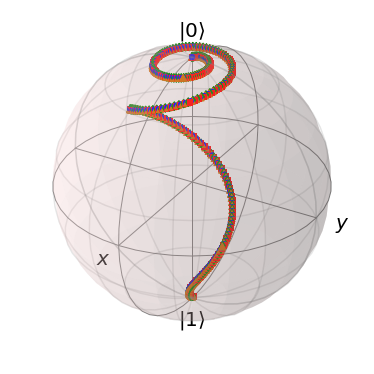

In [ ]:
from numpy import linalg as npla

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return (eigenValues)

optimized_dynamics = opt_result.optimized_objectives[0].mesolve(
      tlist, e_ops=[]
  )
Ergotropy=np.zeros(nt)
Energy=np.zeros(nt)
matrix=np.zeros(nt)

b = qutip.Bloch()

for i in range(0,nt):
  FinalRho=trace_A(np.array(optimized_dynamics.states[i]*optimized_dynamics.states[i].dag()))
  matrix[i]=np.real(FinalRho[0,0])
  point1=[2*np.real(FinalRho[0,1]), -2*np.imag(FinalRho[0,1]), FinalRho[0,0] -FinalRho[1,1]]
  b.add_points(point1)
  Rho_f=eigenvalues(FinalRho)[1]*np.array([[1, 0], [0, 0]])+eigenvalues(FinalRho)[0]*np.array([[0, 0], [0, 1]])
  Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array([[0, 0], [0, 1]]),FinalRho)))
  Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array([[0, 0], [0, 1]]),(Rho_f-FinalRho))))
 


plt.plot(tlist,Energy,label='Energy')
plt.plot(tlist,Ergotropy,label='Ergotropy')
plt.xlabel("time")
plt.ylabel("Energy, Ergotropy")
plt.legend() 
plt.figure()
plt.plot(tlist,matrix,label="0")
plt.plot(tlist,Energy,label="1")
plt.legend() 
plt.show()
b.render()

In [ ]:
optimized_dynamics = opt_result.optimized_objectives[0].mesolve(
      tlist, e_ops=[]
  )


HA =  omega * qutip.tensor(0.5*(-qutip.operators.sigmaz()),qutip.qeye(2))
HB =  omega* qutip.tensor(qutip.qeye(2),0.5*(-qutip.operators.sigmaz()))
HAB = g*(qutip.tensor(qutip.destroy(2),qutip.create(2))+qutip.tensor(qutip.create(2),qutip.destroy(2)))
H0 = HA+HB+HAB
H=np.array(H0)
print(H)
Uncert=np.dot(np.dot(np.array(optimized_dynamics.states[0].dag()),H**2),np.array(optimized_dynamics.states[0]))-(np.dot(np.dot(np.array(optimized_dynamics.states[0].dag()),H),np.array(optimized_dynamics.states[0])))**2
F=np.dot(np.array(optimized_dynamics.states[0].dag()),np.array(optimized_dynamics.states[nt-1]))
print(Uncert)
TQSL=1/Uncert*np.arccos(np.abs(F))
print(TQSL)

print(T-TQSL)

[[-1. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0.2+0.j  0. +0.j]
 [ 0. +0.j  0.2+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  1. +0.j]]
[[0.+0.j]]
[[nan+nanj]]
[[nan+nanj]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


In [ ]:
optimized_dynamics = opt_result.optimized_objectives[0].mesolve(
      tlist, e_ops=[]
  )

Q=0
Q2=0
HA =  omega * qutip.tensor(0.5*(-qutip.operators.sigmaz()+qutip.qeye(2)),qutip.qeye(2))
HB =  omega* qutip.tensor(qutip.qeye(2),0.5*(-qutip.operators.sigmaz()+qutip.qeye(2)))
HAB = g*(qutip.tensor(qutip.destroy(2),qutip.create(2))+qutip.tensor(qutip.create(2),qutip.destroy(2)))
H0 = HA+HB+HAB

for i in range (0,nt):
  H1 = -qutip.tensor(0.5*qutip.operators.sigmax(),qutip.qeye(2))*opt_result.optimized_controls[0][i]
  H=H0+H1
  L=qutip.liouvillian(H)
  rho=optimized_dynamics.states[i]*optimized_dynamics.states[i].dag()
  ket=optimized_dynamics.states[i]
  Q += 1/(nt-1)*np.sqrt((2*np.trace(np.array(rho**2*H**2-(rho*H)**2)))/((np.trace(np.array(rho*rho-(qutip.tensor(qutip.qeye(2),qutip.qeye(2)))/16)))))
  Q2 += 1/(nt-1)*np.sqrt(np.trace(np.array(L(rho).dag()*L(rho))))

rho0=optimized_dynamics.states[0]*optimized_dynamics.states[0].dag()
rhoi=np.array(rho0)
vrho0=[2*np.real(rhoi[0][1]),-2*np.imag(rhoi[0][1]),np.real(rhoi[0][0]-rhoi[1][1])]
rhof=optimized_dynamics.states[nt-1]*optimized_dynamics.states[nt-1].dag()
rhof=np.array(rhof)
vrhof=[2*np.real(rhof[0][1]),-2*np.imag(rhof[0][1]),np.real(rhof[0][0]-rhof[1][1])]
#Phi=np.arccos(np.sqrt((np.array(np.trace(rho0*rhof)))/(np.trace(np.array(rho0*rho0)))))
Phi=np.arccos(np.dot(vrho0,vrhof))
#Fid=np.sqrt(np.trace(np.array((rho0-rhof)**2)))
Tf=Phi/Q 
#Tf2=Fid/Q2
print(T)
print(Tf)
print(T-Tf)


15.707963267948966
(4.751358632938551-9.3259923157834e-13j)
(10.956604635010414+9.3259923157834e-13j)


In [ ]:
print(rho)
print(qutip.qeye(4))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.18640953e-04+0.00000000e+00j -1.04913022e-02+2.83641088e-03j
  -4.67573874e-04-4.93949242e-04j -2.21235216e-04-5.16912043e-05j]
 [-1.04913022e-02-2.83641088e-03j  9.95547036e-01+0.00000000e+00j
   2.95379945e-02+5.48579749e-02j  1.83278031e-02+9.86018735e-03j]
 [-4.67573874e-04+4.93949242e-04j  2.95379945e-02-5.48579749e-02j
   3.89925376e-03+0.00000000e+00j  1.08711735e-03-7.17370426e-04j]
 [-2.21235216e-04+5.16912043e-05j  1.83278031e-02-9.86018735e-03j
   1.08711735e-03+7.17370426e-04j  4.35069007e-04+0.00000000e+00j]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
    """Two-level-system Hamiltonian

      Args:
          omega (float): energy separation of the qubit levels
          ampl0 (float): constant amplitude of the driving field
      """
optimized_dynamics = opt_result.optimized_objectives[0].mesolve(
      tlist, e_ops=[]
  )

L0 = qutip.liouvillian(H=H0)
rhof=optimized_dynamics.states[nt-1]*optimized_dynamics.states[nt-1].dag()
rhoi=optimized_dynamics.states[0]*optimized_dynamics.states[0].dag()
rhodif= np.array(rhoi-rhof)
fid= np.sqrt(np.trace(np.dot(rhodif,rhodif)))
integral=0
for i in range(0,nt):
  H1 = -qutip.tensor(0.5*qutip.operators.sigmax(),qutip.qeye(2))*opt_result.optimized_controls[0][i]
  L1 = qutip.liouvillian(H=H1)
  L = L0 + L1
  rhot= L(optimized_dynamics.states[i]*optimized_dynamics.states[i].dag())
  integral += (1/(nt-1))*np.sqrt(np.trace(np.array(rhot.dag()*rhot)))


print("T = ", T)
print("T_QSL = ", np.real(fid/integral))
print("T - T_QSL = ", T-np.real(fid/integral))

T =  15.707963267948966
T_QSL =  2.5471565171549493
T - T_QSL =  13.160806750794016


In [ ]:
for i in range (0,nt):
  rho=np.array(optimized_dynamics.states[i]*optimized_dynamics.states[i].dag())
  print(rho[0][1])

0j
(-1.6292537578847838e-10+0j)
(-1.8424078411623442e-09-2.2679248793967603e-11j)
(-9.62253633974947e-09-1.7393975653516126e-10j)
(-3.3289549228878785e-08-7.835558911159285e-10j)
(-8.988413083670582e-08-2.596694621213651e-09j)
(-2.0547937635431234e-07-7.031868146840092e-09j)
(-4.170185570446097e-07-1.6495013478311413e-08j)
(-7.739150846866633e-07-3.474711067421242e-08j)
(-1.339522297686906e-06-6.73207203794757e-08j)
(-2.192442082044762e-06-1.2198062333699557e-07j)
(-3.427659720997291e-06-2.092234608582505e-07j)
(-5.157494652953913e-06-3.4281093541020153e-07j)
(-7.512358943192897e-06-5.403306217817139e-07j)
(-1.0641315720671715e-05-8.237784013816868e-07j)
(-1.4712431568002008e-05-1.2201562524094946e-06j)
(-1.991291869478411e-05-1.7620789723926794e-06j)
(-2.6449064266616948e-05-2.488383308088214e-06j)
(-3.4545945931334966e-05-3.444732904942514e-06j)
(-4.444693427796764e-05-4.684212476530974e-06j)
(-5.6412984642639716e-05-6.267904630769199e-06j)
(-7.072172228460695e-05-8.265442905919293e-

In [ ]:
from abc import ABC, abstractmethod

import numpy as np
import qutip
import scipy
from qutip.cy.spconvert import dense2D_to_fastcsr_fmode
from qutip.cy.spmatfuncs import spmvpy_csr
from qutip.superoperator import mat2vec, vec2mat


__all__ = ['expm', 'Propagator', 'DensityMatrixODEPropagator']


def expm(H, state, dt, c_ops=None, backwards=False, initialize=False):
    """Propagate using matrix exponentiation

    This supports `H` being a Hamiltonian (for a Hilbert space `state`) or a
    Liouvillian (for `state` being a density matrix) in nested-list format.
    Collapse operators `c_ops` are not supported. The propagator is not
    stateful, thus `initialize` is ignored.
    """
    if c_ops is None:
        c_ops = []
    if len(c_ops) > 0:
        raise NotImplementedError("Liouville exponentiation not implemented")
    assert isinstance(H, list) and len(H) > 0
    eqm_factor = -1j  # factor in front of H on rhs of the equation of motion
    if isinstance(H[0], list):
        if H[0][1].type == 'super':
            eqm_factor = 1
        if backwards:
            eqm_factor = eqm_factor.conjugate()
        A = (eqm_factor * H[0][1]) * H[0][0]
    else:
        if H[0].type == 'super':
            eqm_factor = 1
        if backwards:
            eqm_factor = eqm_factor.conjugate()
        A = eqm_factor * H[0]
    for part in H[1:]:
        if isinstance(part, list):
            A += (eqm_factor * part[1]) * part[0]
        else:
            A += eqm_factor * part
    ok_types = (state.type == 'oper' and A.type == 'super') or (
        state.type in ['ket', 'bra'] and A.type == 'oper'
    )
    if ok_types:
        return ((A * dt).expm())(state)
    else:
        raise NotImplementedError(
            "Cannot handle argument types A:%s, state:%s"
            % (A.type, state.type)
        )

omega=1
g=0.2*omega
ampl0=0.0000001+0j
#T=8
#ampl0=1
T=np.pi/g
nt=1000
tlist = np.linspace(0,T, nt)
def hamiltonian(omega, ampl0, g):
      """Two-level-system Hamiltonian

      Args:
          omega (float): energy separation of the qubit levels
          ampl0 (float): constant amplitude of the driving field
      """
      HA =  omega * qutip.tensor(0.5*(-qutip.operators.sigmaz()),qutip.qeye(2))
      HB =  omega* qutip.tensor(qutip.qeye(2),0.5*(-qutip.operators.sigmaz()))
      HAB = g*(qutip.tensor(qutip.destroy(2),qutip.create(2))+qutip.tensor(qutip.create(2),qutip.destroy(2)))
      H0 = HA+HB+HAB
      H1 = -qutip.tensor(0.5*qutip.operators.sigmax(),qutip.qeye(2))

      def guess_control(t, args):
          return ampl0 *krotov.shapes.flattop(
              t, t_start=0, t_stop=T, t_rise=0.005, func="blackman"
          )

      return [H0, [H1, 5]]


In [ ]:
expm(hamiltonian(omega,ampl0,g), qutip.tensor(qutip.ket("0"),qutip.ket("0")), T/(nt-1), c_ops=None, backwards=False, initialize=False)

In [ ]:
hamiltonian(omega,ampl0,g)[0]

In [ ]:
print(qutip.Qobj(np.eye(4)))

In [17]:
hamiltonian(2,5,2)

[Quantum object: dims = [[15], [15]], shape = (15, 15), type = oper, isherm = False
 Qobj data =
 [[1.08602416 0.66188681 0.72619927 1.00578677 0.68932275 0.92552788
   0.2386143  1.03783133 0.61781952 0.39161298 0.29693057 0.43031324
   0.64291148 1.0222388  0.81887365]
  [0.68195557 1.04969734 0.63520289 0.51962827 1.21935838 0.5130396
   0.79163522 0.63625899 0.92690289 0.85781388 0.48403956 0.33399188
   0.98427252 0.84438374 0.85064083]
  [0.61157802 0.33475476 0.37388666 0.84081808 1.10856581 0.47831971
   1.00682191 0.34717629 0.60543233 0.65481942 1.05724774 0.26455307
   0.72735198 0.18117238 1.06072897]
  [0.89090758 0.93398004 0.3043761  0.68101732 0.90180298 1.21058536
   0.52856323 0.86460814 0.6756025  0.88282619 0.64379104 0.51927658
   1.19233829 1.03885842 0.78206972]
  [0.68585134 0.94191225 0.99063674 0.80868482 0.82538403 1.08362736
   0.40036743 0.60749074 0.60954809 0.86178055 0.63151593 0.8549435
   0.68621851 0.71116363 0.85228259]
  [0.68983196 0.57587862 1.009

In [45]:
qutip.Qobj(np.array([0]+[5]*2))

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.]
 [5.]
 [5.]]

In [5]:
[0]*5 <2

TypeError: '<' not supported between instances of 'list' and 'int'

In [31]:
qutip.Qobj(np.array([1]*15))[3,0]

(1+0j)

In [7]:
F=qutip.Qobj(np.array([ 1.-1.56765159e-06j,-1.41421356+2.21699413e-06, 0.+0.00000000e+00j, 0.+0.00000000e+00j, 0.+0.00000000e+00j,-0.5+7.83825799e-07j,
 0.+0.00000000e+00j,0.+0.00000000e+00j,0.+0.00000000e+00j,-0.5+7.83825794e-07j,0.+0.00000000e+00j,0.+0.00000000e+00j,0.5-7.83825766e-07j,0.+0.00000000e+00j,
 0.5-7.83825801e-07j]))

In [8]:
F

Quantum object: dims = [[15], [1]], shape = (15, 1), type = ket
Qobj data =
[[ 1.        -1.56765159e-06j]
 [-1.41421134+0.00000000e+00j]
 [ 0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j]
 [-0.5       +7.83825799e-07j]
 [ 0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j]
 [-0.5       +7.83825794e-07j]
 [ 0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j]
 [ 0.5       -7.83825766e-07j]
 [ 0.        +0.00000000e+00j]
 [ 0.5       -7.83825801e-07j]]

In [9]:
W=qutip.Qobj(np.array([1,np.sqrt(2),0,0,0,1/2,0,0,0,1/2,0,0,1/2,0,1/2]))

In [10]:
inte.overlap2(F,W)

Integral in $\alpha_{4}$  is divergent, integrand does not fulfill $Re(C_{44})<0$

NameError: None

In [26]:
start=0
step=0.5
num=5

result=np.arange(0,num)*step+start

result

array([0. , 0.5, 1. , 1.5, 2. ])

In [27]:
suma=0
for time_index in range(len(result) - 1):
    for i in result:
        if result[time_index]>=i:
            suma+=0.5
            print(suma,i,time_index)
suma

0.5 0.0 0
1.0 0.0 1
1.5 0.5 1
2.0 0.0 2
2.5 0.5 2
3.0 1.0 2
3.5 0.0 3
4.0 0.5 3
4.5 1.0 3
5.0 1.5 3


5.0

In [7]:
_nested_list_shallow_copy(['Ha',['Hb']])

NameError: name '_nested_list_shallow_copy' is not defined

In [4]:
def suma(a,b,c=12):
    return a+b+c

In [6]:
suma(1,2,1)

4

In [6]:
def f1(x):
   return x**2

def f2(x):
   return x**3

x = np.array([1,3,4])
y1 = f1(x)
from scipy.integrate import simpson
I1 = simpson(y1[:2], x[:2])
print(I1)

10.0


In [6]:
x

array([1, 3, 4])

In [8]:
y1

array([ 1,  9, 16])

In [6]:
z=[np.array([-1.38777878e-25,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
       -1.38777878e-25])]

In [7]:
z[0]

array([-1.38777878e-25,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
       -1.38777878e-25])

In [7]:
x=[-1.38777878e-25,  1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08,
  1.00000000e-08 , 1.00000000e-08,  1.00000000e-08,  1.00000000e-08,
  1.00000000e-08 , 1.00000000e-08,  1.00000000e-08 , 1.00000000e-08,
  1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08, 1.00000000e-08,
  1.00000000e-08,  1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08,
  1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08,
  1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08,
  1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08,
  1.00000000e-08 , 1.00000000e-08  ,1.00000000e-08 , 1.00000000e-08,
  1.00000000e-08,  1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08,
  1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08 , 1.00000000e-08,
  1.00000000e-08 , 1.00000000e-08  ,1.00000000e-08 , 1.00000000e-08,
 -1.38777878e-25]
y=[0.      ,   0.20408163, 0.40816327, 0.6122449 , 0.81632653, 1.02040816,
 1.2244898 , 1.42857143, 1.63265306, 1.83673469, 2.04081633, 2.24489796,
 2.44897959, 2.65306122, 2.85714286, 3.06122449, 3.26530612, 3.46938776,
 3.67346939 ,3.87755102, 4.08163265, 4.28571429, 4.48979592, 4.69387755,
 4.89795918 ,5.10204082, 5.30612245, 5.51020408, 5.71428571, 5.91836735,
 6.12244898, 6.32653061, 6.53061224, 6.73469388, 6.93877551, 7.14285714,
 7.34693878, 7.55102041, 7.75510204, 7.95918367, 8.16326531, 8.36734694,
 8.57142857,8.7755102,  8.97959184, 9.18367347 ,9.3877551 , 9.59183673,
 9.79591837]

In [8]:
x=np.array(x)
y=np.array(y)

In [11]:
simpson(x[:1],y[:1])

0.0

3

In [30]:
HA = qutip.Qobj(H0(g,gamma,Nb))
H1= qutip.Qobj(He(mu))

In [31]:
HA*t

Quantum object: dims = [[15], [15]], shape = (15, 15), type = oper, isherm = False
Qobj data =
[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.125  0.    -1.    -0.2    0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.2   -1.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     1.     0.2    0.125  0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.2    1.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [-0.625  0.     0.     0.     0.     0.25   0.    -2.    -0.4    0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.125 -0.2   -1.     0.
  -1.    -0.2    0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     1.     0.2    0.25   0.     0.
   0.     0.    -1.    -0.2    0.   ]
 [ 0.     0.     0.     0.     0.     0.2    1.  

In [32]:
H1

Quantum object: dims = [[15], [15]], shape = (15, 15), type = oper, isherm = False
Qobj data =
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.70710678  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.         